In [28]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [29]:
# Load combined_df.pkl as a pandas dataframe called df
df = pd.read_pickle('combined_df.pkl')

In [31]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUG/NARCOTIC', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'])

In [32]:
df['Date'] = pd.to_datetime(df['Date'])
focuscrime_df = df[df['Category'].isin(focuscrimes)].copy()
focuscrime_df['Year'] = focuscrime_df['Date'].dt.year
focuscrime_df['Year'].unique()

array([2004, 2005, 2010, 2013, 2017, 2016, 2006, 2009, 2012, 2003, 2007,
       2008, 2011, 2015, 2014, 2018, 2023, 2019, 2020, 2021, 2022, 2024,
       2025], dtype=int32)

In [33]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUG/NARCOTIC', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'])

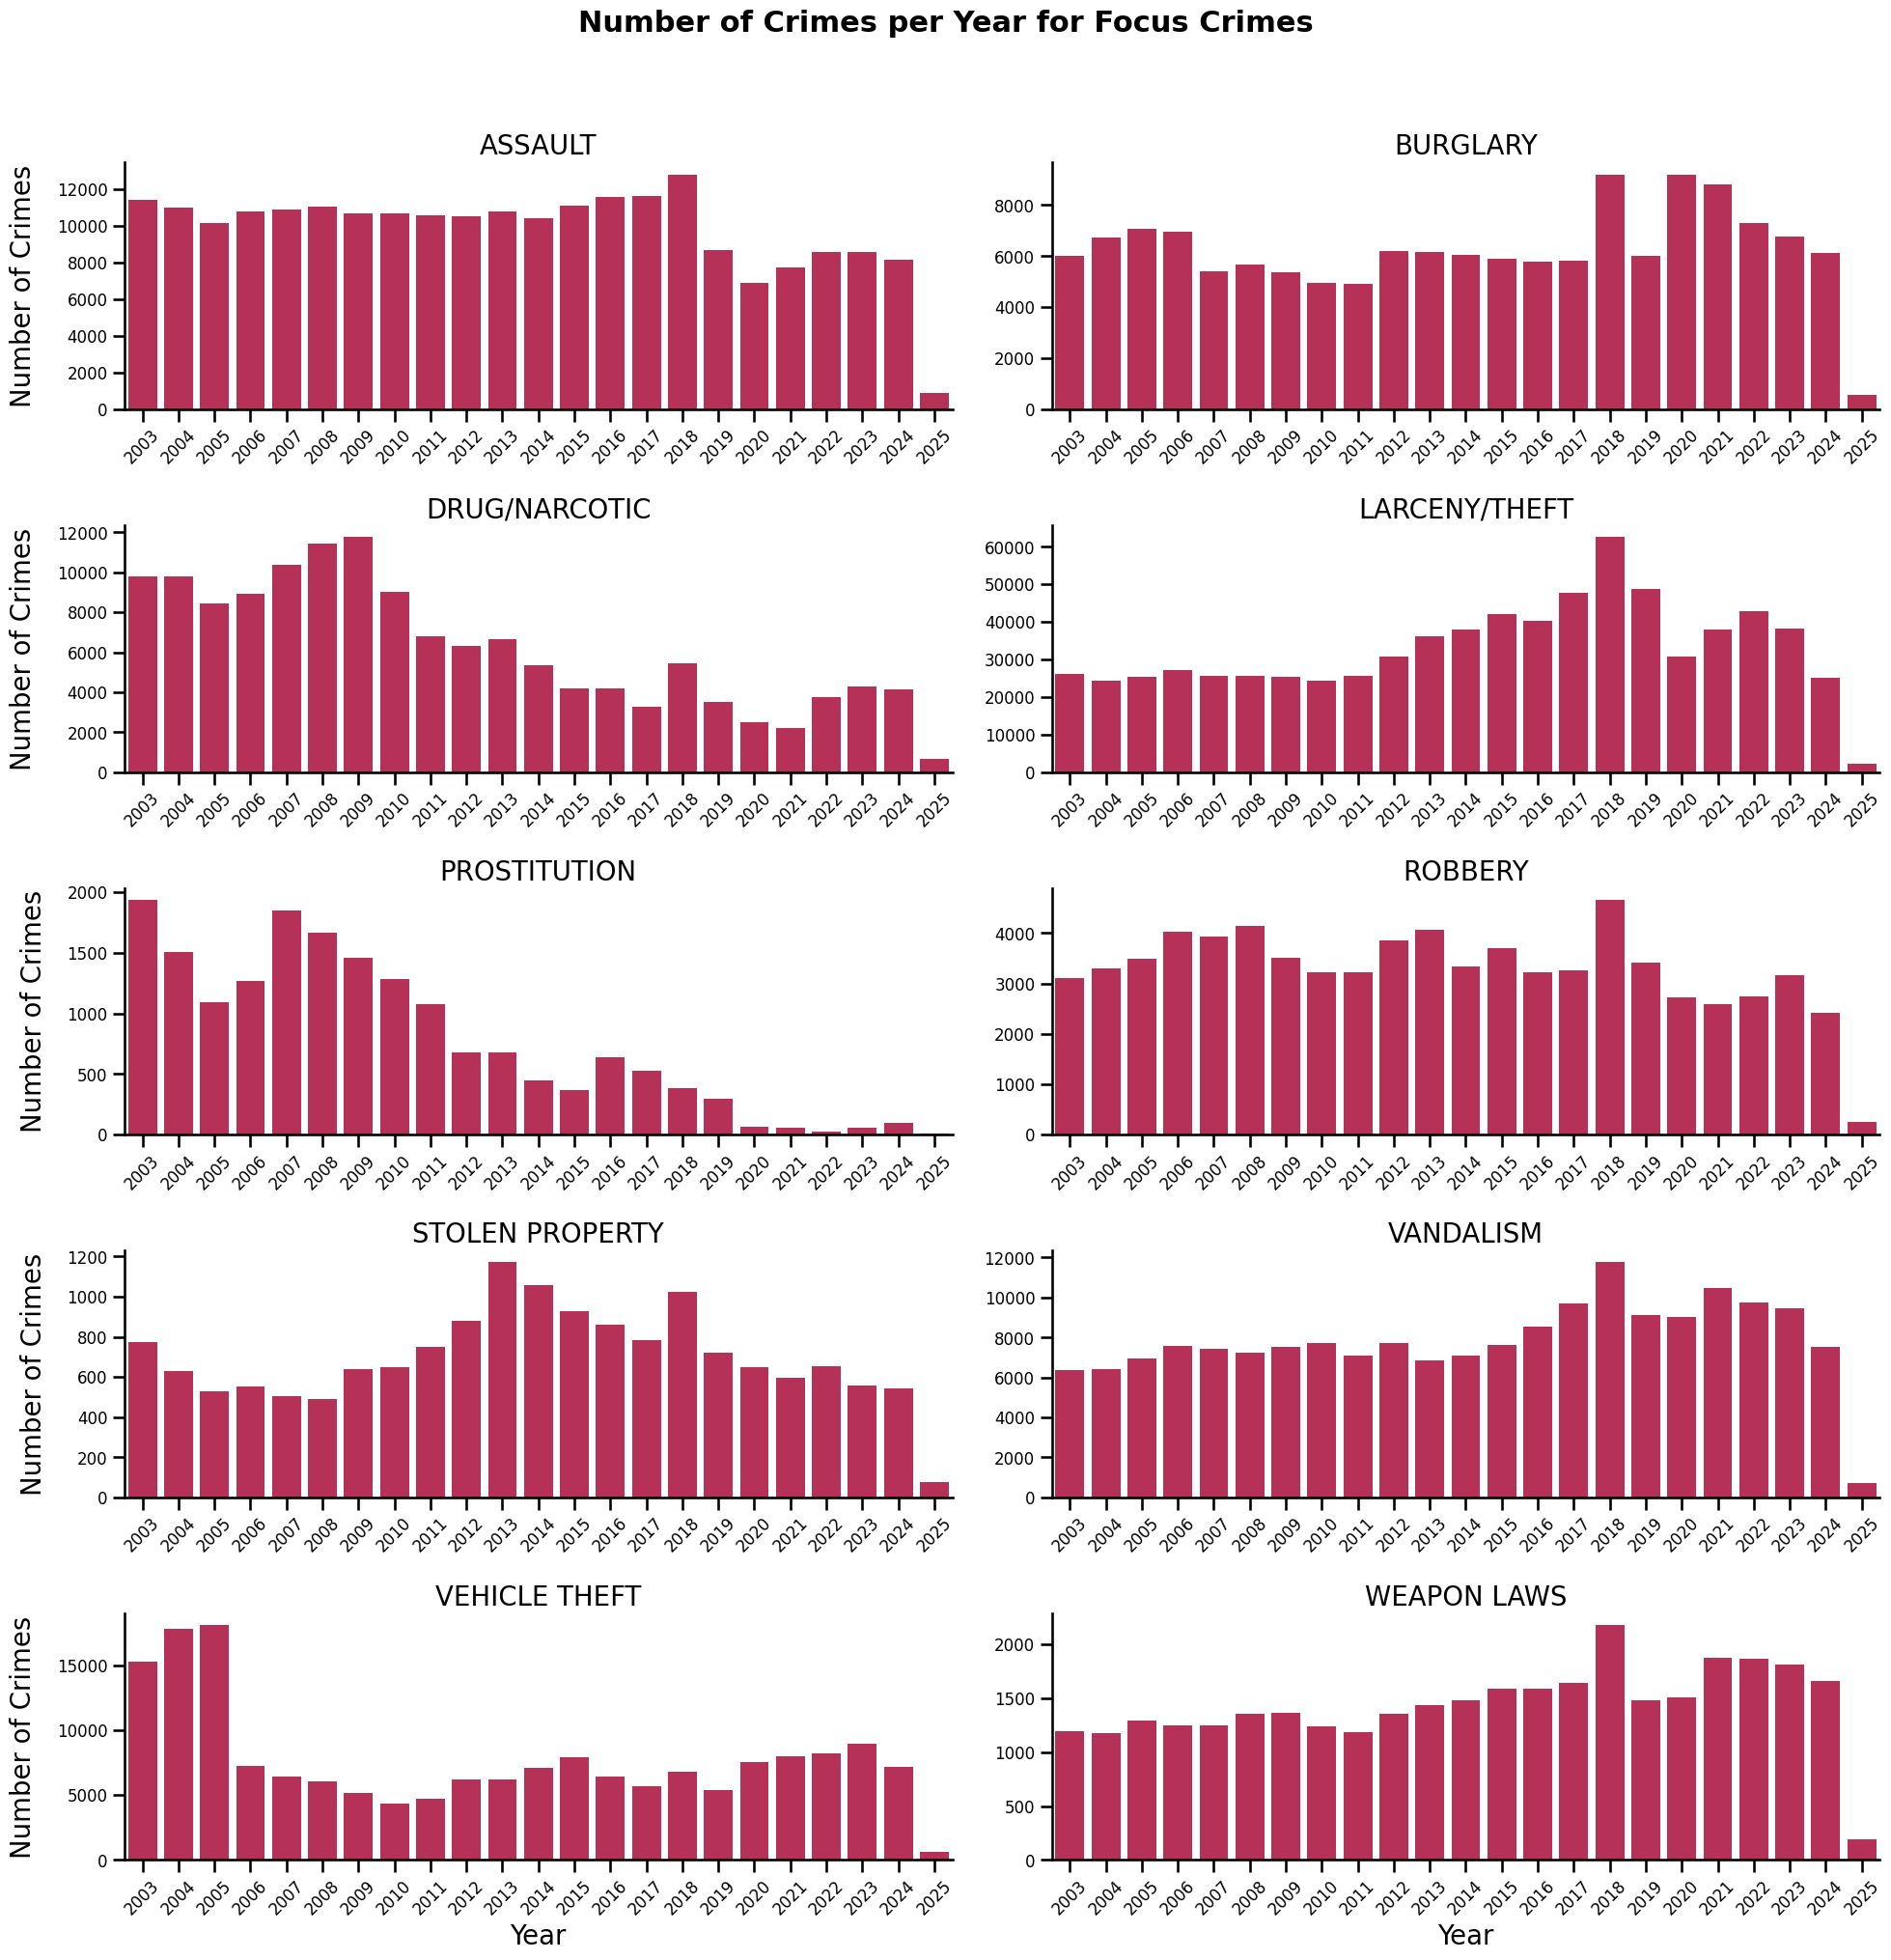

In [ ]:
# Set context to increase text sizes for a talk-like presentation style
sns.set_context("talk", font_scale=1.1)

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter the DataFrame to only include focus crimes
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'ROBBERY', 'BURGLARY', 'ASSAULT', 
                   'DRUG/NARCOTIC', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY'])
focuscrime_df = df[df['Category'].isin(focuscrimes)].copy()

# Extract the year from the 'Date' column
focuscrime_df['Year'] = focuscrime_df['Date'].dt.year

# Group by 'Category' and 'Year' and count occurrences
crime_counts = (
    focuscrime_df.groupby(['Category', 'Year'])
    .size()
    .reset_index(name='Count')
)

# Create a facet grid with 2 columns and free y-axis for each plot (sharey=False)
g = sns.FacetGrid(crime_counts, col="Category", col_wrap=2, height=4, aspect=2.5, sharey=False, sharex=False)

# Extract a single color from the 'rocket' palette
rocket_color = sns.color_palette("rocket", 1)[0]

# Use map_dataframe to pass the data subset to each facet and create a barplot with the chosen color
g.map_dataframe(sns.barplot, x="Year", y="Count", color=rocket_color)

# Customize the axis labels and facet titles
g.set_axis_labels("Year", "Number of Crimes")
g.set_titles("{col_name}")

# Increase space between the y-axis title and the plot
for ax in g.axes.flat:
    ax.yaxis.labelpad = 15

# Tick label sizes on each axis
for ax in g.axes.flat:
    ax.tick_params(axis='both', labelsize=12)

# Rotate x-axis labels
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        
# Title
g.fig.suptitle("Number of Crimes per Year for Focus Crimes", fontsize=22, fontweight='bold', y=1.02)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
